# Importing libraries

In [ ]:
import numpy as np
import random
import math
from math import exp

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
from logres import lin_model, MCMC
from convergence_test import gelman_rubin

# Setting the dataset

For each problem, the corresponding traning and testing set are declared, as well as the model shape.

In [4]:
problem = 4

if problem == 1:
    traindata = np.loadtxt("data/Lazer/train.txt")
    testdata = np.loadtxt("data/Lazer/test.txt")  #
    name = "Lazer"
    features = 4  
    output = 1
    activation = False  # true for sigmoid, false for linear
elif problem == 2:
    traindata = np.loadtxt("data/Sunspot/train.txt")
    testdata = np.loadtxt("data/Sunspot/test.txt")  
    name = "Sunspot"
    features = 4  
    output = 1
    activation = False  # true for sigmoid, false for linear
elif problem == 3:
    pass
elif problem == 4:
    data  = np.genfromtxt('data/iris.csv',delimiter=';')
    classes = data[:,4].reshape(data.shape[0],1)-1
    features = data[:,0:4] #Normalizing Data
    name = "Iris"

    for k in range(4):
        mean = np.mean(features[:,k])
        dev = np.std(features[:,k])
        features[:,k] = (features[:,k]-mean)/dev
        train_ratio = 0.7 #choose
        indices = np.random.permutation(features.shape[0])
        traindata = np.hstack([features[indices[:np.int(train_ratio*features.shape[0])],:],classes[indices[:np.int(train_ratio*features.shape[0])],:]])
        testdata = np.hstack([features[indices[np.int(train_ratio*features.shape[0])]:,:],classes[indices[np.int(train_ratio*features.shape[0])]:,:]])
        activation = True
    
    features = 4
    output = 3
        
elif problem == 5:
    traindata = np.genfromtxt('data/ionesphere/ftrain.csv',delimiter=',')[:,:-1]
    testdata = np.genfromtxt('data/ionesphere/ftest.csv',delimiter=',')[:,:-1]
    name = "Ionosphere"
    features = 34
    output = 2
    activation = True

# Training the model


In [5]:
for i in range(5):
    topology = [features, output]
    MinCriteria = 0.005  # stop when RMSE reaches MinCriteria ( problem dependent)
    numSamples = 50000

    mcmc = MCMC(numSamples, traindata, testdata, topology, activation)  # declare class

    [pos_w, pos_tau, fx_train, fx_test, rmse_train, rmse_test, accept_ratio] = mcmc.sampler()
    print('sucessfully sampled')
    np.savetxt('result/' + name + '/linreg_pos_w_' + str(i) + '.txt', pos_w)

evaluate Initial w
-174.60929534959527  initial likelihood
-174.9214071946955 -3.545581398877054 0.9918532800813195 1.490696317818031 [-0.33320893  0.07175291 -0.54759439 -0.61837618 -1.470719    0.56193036
  0.8709425 ] accepted
-174.22620192420365 -3.5533134519457907 0.9893934263039972 1.4872816123443886 [-0.30269081  0.07773108 -0.58507354 -0.62217452 -1.47210044  0.58009402
  0.87839995] accepted
-173.50783051382882 -3.5390158030098826 0.9828546198462609 1.4789072959559992 [-0.28368377  0.08599401 -0.60345628 -0.61466217 -1.43215837  0.59521691
  0.92390061] accepted
-173.42930998566845 -3.5596339516692264 0.986731935317584 1.4866970280108893 [-0.26209744  0.10503472 -0.60912025 -0.58856301 -1.42795376  0.62926223
  0.95643054] accepted
-170.34006905299447 -3.569604652916952 0.9760893800470604 1.4710132743686088 [-0.27809921  0.12054582 -0.62535389 -0.59446495 -1.40037137  0.63419788
  0.99026376] accepted
-169.01295437932757 -3.580247853042313 0.9732253145655403 1.467079646066494 

Finding the mean, 5% and 95% percentile of the posterior, as well as the RMSE.

In [6]:
fx_mu = fx_test.mean(axis=0)
fx_high = np.percentile(fx_test, 95, axis=0)
fx_low = np.percentile(fx_test, 5, axis=0)

fx_mu_tr = fx_train.mean(axis=0)
fx_high_tr = np.percentile(fx_train, 95, axis=0)
fx_low_tr = np.percentile(fx_train, 5, axis=0)


rmse_tr = np.mean(rmse_train)
rmsetr_std = np.std(rmse_train)
rmse_tes = np.mean(rmse_test)
rmsetest_std = np.std(rmse_test)

ytestdata = testdata[:, features]
ytraindata = traindata[:, features]
x_test = np.linspace(0, 1, num=testdata.shape[0])
x_train = np.linspace(0, 1, num=traindata.shape[0])

In [7]:
print('---RMSE train---')
print('mean', mcmc.rmse(ytraindata, fx_mu_tr))
print('high', mcmc.rmse(ytraindata, fx_high_tr))
print('low', mcmc.rmse(ytraindata, fx_low_tr))
print('---RMSE test---')
print('mean', mcmc.rmse(ytestdata, fx_mu))
print('high', mcmc.rmse(ytestdata, fx_high))
print('low', mcmc.rmse(ytestdata, fx_low))

---RMSE train---
mean 0.6148759030283159
high 0.617027421130843
low 0.6296458624025129
---RMSE test---
mean 1.0059364923135847
high 1.0000456488631464
low 1.0191705337287926


# Visualising the results

Plotting the results and the distributions of posterior weights.

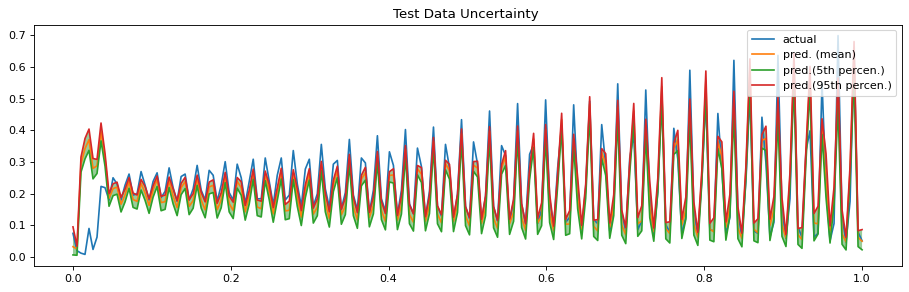

<Figure size 432x288 with 0 Axes>

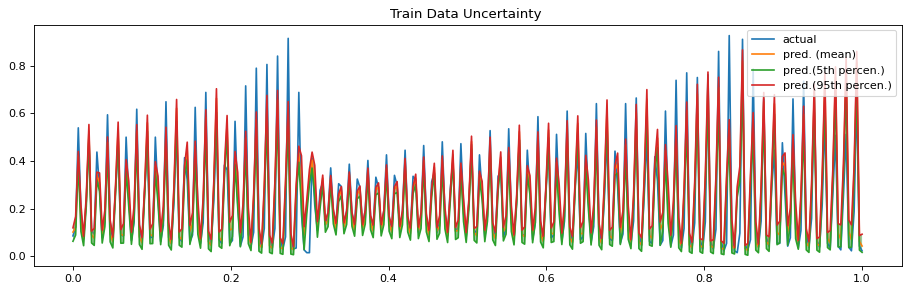

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

<Figure size 1120x320 with 0 Axes>

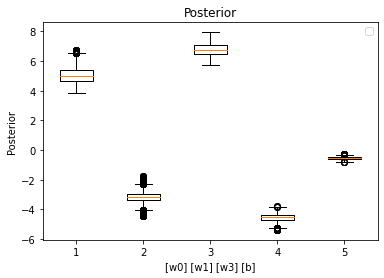

<Figure size 432x288 with 0 Axes>

In [7]:
# Testing set
figure(figsize=(14, 4), dpi=80)
plt.plot(x_test, ytestdata, label='actual')
plt.plot(x_test, fx_mu, label='pred. (mean)')
plt.plot(x_test, fx_low, label='pred.(5th percen.)')
plt.plot(x_test, fx_high, label='pred.(95th percen.)')
plt.fill_between(x_test, fx_low, fx_high, facecolor='g', alpha=0.4)
plt.legend(loc='upper right')
plt.title("Test Data Uncertainty ")
plt.show()
plt.clf()

# Training set
figure(figsize=(14, 4), dpi=80)
plt.plot(x_train, ytraindata, label='actual')
plt.plot(x_train, fx_mu_tr, label='pred. (mean)')
plt.plot(x_train, fx_low_tr, label='pred.(5th percen.)')
plt.plot(x_train, fx_high_tr, label='pred.(95th percen.)')
plt.fill_between(x_train, fx_low_tr, fx_high_tr, facecolor='g', alpha=0.4)
plt.legend(loc='upper right')
plt.title("Train Data Uncertainty ")
plt.show()
plt.clf()

# Posterior weights
figure(figsize=(14, 4), dpi=80)
mpl_fig = plt.figure()
ax = mpl_fig.add_subplot(111)
ax.boxplot(pos_w)
ax.set_xlabel('[w0] [w1] [w3] [b]')
ax.set_ylabel('Posterior')
plt.legend(loc='upper right')
plt.title("Posterior")
plt.show()
plt.clf()

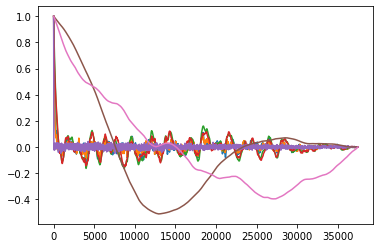

In [7]:
# Plotting the autocorrelation
from emcee import autocorr
# autocorr.integrated_time
for i in range(pos_run1.shape[1]):
    xc = autocorr.function_1d(pos_run1[:, i])
    plt.plot(xc)
    
plt.savefig('result/' + name + '/autocor_linreg.png')